# Quantum Information Science HW P3
### Harris A. Ransom
### 12/1/24

In [4]:
# Imports
import math
import matplotlib.pyplot as plt

# Imports from Qiskit
import qiskit
from qiskit import QuantumCircuit
from qiskit.circuit.library import GroverOperator, MCMT, ZGate
from qiskit.visualization import plot_distribution
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# Imports from Qiskit Runtime
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2 as Sampler

## Question 1

Derivation of three Grover’s iterations for N = 32:

### Definitions
- $U_{\omega} = I - 2|\omega \rangle \langle \omega| $
- **Grover Diffusion Operator:** $U_{|\psi_0 \rangle} = 2 |\psi_0 \rangle \langle \psi_0| - I$

### Initialization
Apply Hadamard gates to achieve a uniform superposition of basis states:

$|\psi_0 \rangle = \displaystyle \frac{1}{\sqrt{32}} \sum_{x=0}^{31}|x \rangle $

### Iteration 1
$U_{\omega}(|\psi_0 \rangle) = (I - 2|\omega \rangle \langle \omega|) |\psi_0 \rangle = |\psi_0 \rangle - (2 |\omega \rangle \langle \omega | \psi_0 \rangle ) = |\psi_0 \rangle - \frac{2}{\sqrt{32}} |\omega \rangle $

$U_{|\psi_0 \rangle}(|\psi_0 \rangle - \frac{2}{\sqrt{32}} |\omega \rangle) = (2 |\psi_0 \rangle \langle \psi_0| - I) \cdot (|\psi_0 \rangle - \frac{2}{\sqrt{32}} |\omega \rangle)$

$U_{|\psi_0 \rangle}(|\psi_0 \rangle - \frac{2}{\sqrt{32}} |\omega \rangle) = (2 |\psi_0 \rangle \langle \psi_0| \psi_0 \rangle - |\psi_0 \rangle) - (\frac{4}{\sqrt{32}} |\psi_0 \rangle \langle \psi_0| \omega \rangle - \frac{2}{\sqrt{32}} | \omega \rangle)$

$U_{|\psi_0 \rangle}(|\psi_0 \rangle - \frac{2}{\sqrt{32}} |\omega \rangle) = 2 |\psi_0 \rangle  - |\psi_0 \rangle - \frac{4}{\sqrt{32}} |\psi_0 \rangle \langle \psi_0| \omega \rangle +\frac{2}{\sqrt{32}} | \omega \rangle$

$U_{|\psi_0 \rangle}(|\psi_0 \rangle - \frac{2}{\sqrt{32}} |\omega \rangle) = 2 |\psi_0 \rangle  - |\psi_0 \rangle - \frac{4}{32} |\psi_0 \rangle +\frac{2}{\sqrt{32}} | \omega \rangle$

$U_{|\psi_0 \rangle}(|\psi_0 \rangle - \frac{2}{\sqrt{32}} |\omega \rangle) = \frac{7}{8} |\psi_0 \rangle + \frac{1}{2 \sqrt{2}} | \omega \rangle = | \psi_1 \rangle$


### Iteration 2
$U_{\omega}(|\psi_1 \rangle) = (I - 2|\omega \rangle \langle \omega|) |\psi_1 \rangle = |\psi_1 \rangle - (2 |\omega \rangle \langle \omega | \psi_1 \rangle ) = |\psi_1 \rangle - \frac{2}{\sqrt{32}} |\omega \rangle $

$U_{|\psi_1 \rangle}(|\psi_1 \rangle - \frac{2}{\sqrt{32}} |\omega \rangle) = (2 |\psi_1 \rangle \langle \psi_1| - I) \cdot (|\psi_1 \rangle - \frac{2}{\sqrt{32}} |\omega \rangle)$

$U_{|\psi_1 \rangle}(|\psi_1 \rangle - \frac{2}{\sqrt{32}} |\omega \rangle) = (2 |\psi_1 \rangle \langle \psi_1| \psi_1 \rangle - |\psi_1 \rangle) - (\frac{4}{\sqrt{32}} |\psi_1 \rangle \langle \psi_1| \omega \rangle - \frac{2}{\sqrt{32}} | \omega \rangle)$

$U_{|\psi_1 \rangle}(|\psi_1 \rangle - \frac{2}{\sqrt{32}} |\omega \rangle) = 2 |\psi_1 \rangle  - |\psi_1 \rangle - \frac{4}{\sqrt{32}} |\psi_1 \rangle \langle \psi_1| \omega \rangle +\frac{2}{\sqrt{32}} | \omega \rangle$

$U_{|\psi_1 \rangle}(|\psi_1 \rangle - \frac{2}{\sqrt{32}} |\omega \rangle) = 2 |\psi_1 \rangle  - |\psi_1 \rangle - \frac{4}{32} |\psi_1 \rangle +\frac{2}{\sqrt{32}} | \omega \rangle$

$U_{|\psi_1 \rangle}(|\psi_1 \rangle - \frac{2}{\sqrt{32}} |\omega \rangle) = \frac{7}{8} |\psi_1 \rangle + \frac{1}{2 \sqrt{2}} | \omega \rangle = | \psi_2 \rangle$


### Iteration 3
$U_{\omega}(|\psi_2 \rangle) = (I - 2|\omega \rangle \langle \omega|) |\psi_2 \rangle = |\psi_2 \rangle - (2 |\omega \rangle \langle \omega | \psi_2 \rangle ) = |\psi_2 \rangle - \frac{2}{\sqrt{32}} |\omega \rangle $

$U_{|\psi_2 \rangle}(|\psi_2 \rangle - \frac{2}{\sqrt{32}} |\omega \rangle) = (2 |\psi_2 \rangle \langle \psi_2| - I) \cdot (|\psi_2 \rangle - \frac{2}{\sqrt{32}} |\omega \rangle)$

$U_{|\psi_2 \rangle}(|\psi_2 \rangle - \frac{2}{\sqrt{32}} |\omega \rangle) = (2 |\psi_2 \rangle \langle \psi_2| \psi_2 \rangle - |\psi_2 \rangle) - (\frac{4}{\sqrt{32}} |\psi_2 \rangle \langle \psi_2| \omega \rangle - \frac{2}{\sqrt{32}} | \omega \rangle)$

$U_{|\psi_2 \rangle}(|\psi_2 \rangle - \frac{2}{\sqrt{32}} |\omega \rangle) = 2 |\psi_2 \rangle  - |\psi_2 \rangle - \frac{4}{\sqrt{32}} |\psi_2 \rangle \langle \psi_2| \omega \rangle +\frac{2}{\sqrt{32}} | \omega \rangle$

$U_{|\psi_2 \rangle}(|\psi_2 \rangle - \frac{2}{\sqrt{32}} |\omega \rangle) = 2 |\psi_2 \rangle  - |\psi_2 \rangle - \frac{4}{32} |\psi_2 \rangle +\frac{2}{\sqrt{32}} | \omega \rangle$

$U_{|\psi_2 \rangle}(|\psi_2 \rangle - \frac{2}{\sqrt{32}} |\omega \rangle) = \frac{7}{8} |\psi_2 \rangle + \frac{1}{2 \sqrt{2}} | \omega \rangle = | \psi_3 \rangle$

### Simplification
Known states:
- $|\psi_0 \rangle = \displaystyle \frac{1}{\sqrt{32}} \sum_{x=0}^{31}|x \rangle $
- $| \psi_1 \rangle = \frac{7}{8} |\psi_0 \rangle + \frac{1}{2 \sqrt{2}} | \omega \rangle$
- $| \psi_2 \rangle = \frac{7}{8} |\psi_1 \rangle + \frac{1}{2 \sqrt{2}} | \omega \rangle$
- $| \psi_3 \rangle = \frac{7}{8} |\psi_2 \rangle + \frac{1}{2 \sqrt{2}} | \omega \rangle$

Simplifying:
- $| \psi_3 \rangle = \frac{7}{8}(\frac{7}{8} |\psi_1 \rangle + \frac{1}{2 \sqrt{2}} | \omega \rangle) + \frac{1}{2 \sqrt{2}} | \omega \rangle$
- $| \psi_3 \rangle = \frac{49}{64} |\psi_1 \rangle + \frac{15 \sqrt{2}}{32}| \omega \rangle$
- $| \psi_3 \rangle = \frac{49}{64}(\frac{7}{8} |\psi_0 \rangle + \frac{1}{2 \sqrt{2}} | \omega \rangle) + \frac{15 \sqrt{2}}{32}| \omega \rangle$
- $| \psi_3 \rangle = \frac{343}{512}|\psi_0 \rangle + \frac{169 \sqrt{2}}{256} | \omega \rangle$
- $| \psi_3 \rangle = \displaystyle \frac{343 \sqrt{2}}{4096} \sum_{x=0}^{31}|x \rangle + \frac{169 \sqrt{2}}{256} | \omega \rangle$

## Question 2

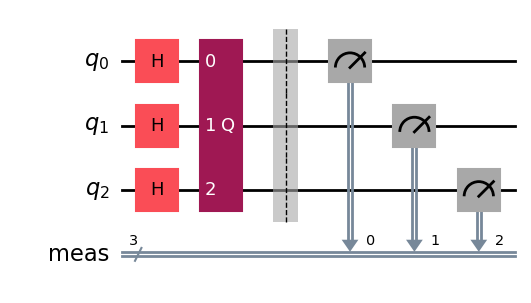

In [5]:
# Code source: https://learning.quantum.ibm.com/tutorial/grovers-algorithm

# Oracle Function
def grover_oracle(marked_states):
    """Build a Grover oracle for multiple marked states

    Here we assume all input marked states have the same number of bits

    Parameters:
        marked_states (str or list): Marked states of oracle

    Returns:
        QuantumCircuit: Quantum circuit representing Grover oracle
    """
    if not isinstance(marked_states, list):
        marked_states = [marked_states]
    # Compute the number of qubits in circuit
    num_qubits = len(marked_states[0])

    qc = QuantumCircuit(num_qubits)
    # Mark each target state in the input list
    for target in marked_states:
        # Flip target bit-string to match Qiskit bit-ordering
        rev_target = target[::-1]
        # Find the indices of all the '0' elements in bit-string
        zero_inds = [ind for ind in range(num_qubits) if rev_target.startswith("0", ind)]
        # Add a multi-controlled Z-gate with pre- and post-applied X-gates (open-controls)
        # where the target bit-string has a '0' entry
        qc.x(zero_inds)
        qc.compose(MCMT(ZGate(), num_qubits - 1, 1), inplace=True)
        qc.x(zero_inds)
    return qc

# Define the Grover Search Instance
marked_states = ["011", "100"] # States to search for with oracle
oracle = grover_oracle(marked_states)
oracle.draw(output="mpl", style="iqp")
plt.show()

# Use builtin Grover Operator to amplify states marked by oracle
grover_op = GroverOperator(oracle)
grover_op.decompose().draw(output="mpl", style="iqp")

# Calculate the optimal number of Grover iterations to perform
optimal_num_iterations = math.floor(
    math.pi / (4 * math.asin(math.sqrt(len(marked_states) / 2**grover_op.num_qubits)))
)

# Create the full Grover Search circuit
qc = QuantumCircuit(grover_op.num_qubits)
qc.h(range(grover_op.num_qubits)) # Create even superposition of all basis states
qc.compose(grover_op.power(optimal_num_iterations), inplace=True) # Apply Grover operator the optimal number of times
qc.measure_all()
qc.draw(output="mpl", style="iqp")

ibm_brisbane


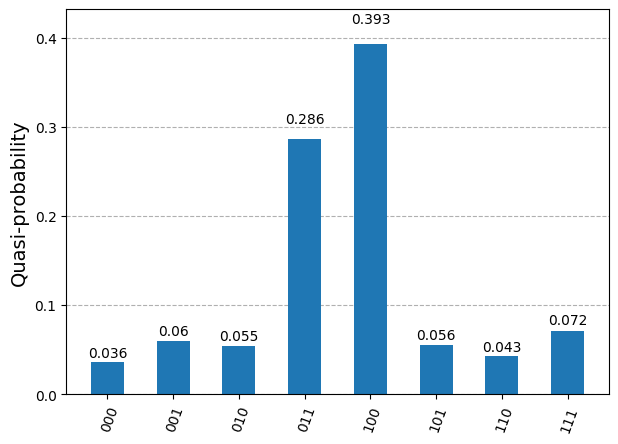

In [6]:
# Select backend service with fewest jobs in queue
service = QiskitRuntimeService(channel="ibm_quantum")
backend = service.least_busy(operational=True, simulator=False)
print(backend.name)

# Transpile quantum circuit to run on quantum hardware
target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)
circuit_isa = pm.run(qc)

# Runs simulation
# To run on local simulator:
#   1. Use the SatetvectorSampler from qiskit.primitives instead
sampler = Sampler(mode=backend)
sampler.options.default_shots = 10_000
result = sampler.run([circuit_isa]).result()
dist = result[0].data.meas.get_counts()
plot_distribution(dist)

We can see that the two "marked" states (011 and 100) had their amplitudes amplified by the Grover Search circuit when compared against the uniform superposition of the other three-qubit states. This distribution, averaged over a statistically significant amount of runs on real quantum hardware, demonstrates the effectiveness of the Grover Search algorithm when the problem can be structured in the form of an oracle. 